# (Ford GoBike System Data Exploration)
## by (Mohamed Refaiy)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(data.shape)
print(data.info())
data.head()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 183,412 trip data in this data set with 16 features
**(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip)**. 
<br>
<br> Most variables are numeric in nature. Columns **(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender)** have some null values.
  

### What is/are the main feature(s) of interest in your dataset?

>1. When are most trips taken in terms of time of day of the week?
>1. Is the rush hour change be day ? 
>1. How long does the average trip take?
>1. What are the most start and end stations?
>1. What is the client gender distribution?
>1. What is the dominant age through the clients?
>1. Does the above depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I blieve that I will use all the features in my investigation

## Data Wrangling

In [5]:
data.sample(25)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
173684,555,2019-02-03 09:59:38.0430,2019-02-03 10:08:53.0960,75.0,Market St at Franklin St,37.773793,-122.421239,321.0,5th St at Folsom,37.780146,-122.403071,5056,Subscriber,1991.0,Male,No
178062,757,2019-02-01 17:51:53.9020,2019-02-01 18:04:31.0280,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,130.0,22nd St Caltrain Station,37.757288,-122.392051,5162,Subscriber,1985.0,Male,No
139336,385,2019-02-07 21:32:51.8870,2019-02-07 21:39:17.2350,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4600,Subscriber,1988.0,Female,No
9076,895,2019-02-28 07:39:59.5760,2019-02-28 07:54:55.1870,156.0,Stanford Ave at Hollis St,37.838443,-122.288665,160.0,West Oakland BART Station,37.805318,-122.294837,4593,Subscriber,1963.0,Other,No
81525,460,2019-02-18 12:56:36.0410,2019-02-18 13:04:16.0510,245.0,Downtown Berkeley BART,37.870139,-122.268422,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,6466,Subscriber,NaN,NaN,No
127076,507,2019-02-10 16:46:23.1410,2019-02-10 16:54:50.8680,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,323.0,Broadway at Kearny,37.798014,-122.405950,844,Customer,NaN,NaN,No
89649,492,2019-02-16 14:59:13.1780,2019-02-16 15:07:25.3560,114.0,Rhode Island St at 17th St,37.764478,-122.402570,355.0,23rd St at Tennessee St,37.755367,-122.388795,5224,Subscriber,1980.0,Male,No
8530,1365,2019-02-28 08:03:06.8600,2019-02-28 08:25:52.8340,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,4752,Subscriber,1990.0,Male,No
71198,1785,2019-02-19 17:19:13.7950,2019-02-19 17:48:59.7600,9.0,Broadway at Battery St,37.798572,-122.400869,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,1101,Customer,1990.0,Male,No
3071,225,2019-02-28 17:39:52.6190,2019-02-28 17:43:38.0940,16.0,Steuart St at Market St,37.794130,-122.394430,22.0,Howard St at Beale St,37.789756,-122.394643,3243,Subscriber,1982.0,Male,No


### Quality and tidness issues
1. complete missing data in start_station_id, start_station_name, end_station_id, end_station_name based on station latitude and longitude 
1. Convert member_birth_year to be in years.
1. Create new column to seprate clients age by decates.
1. Convert ride duration from seconds to minutes.
1. Convert start_time and end_time column to date type
1. Create Day of week column
1. Create new column to calssify the trip duration (Short trip - long trip )


In [6]:
# check for duplicated rows 
data.duplicated().sum()

0

In [7]:
# drop uncomplete rows
data.dropna(inplace=True)

In [8]:
# create Age column
data['Age']= ((2019 - data['member_birth_year'])).astype('int')

In [9]:
# check for age limits 
(data['Age']).min(),(data['Age']).max()

(18, 141)

In [10]:
# create Age group category column
age_group=[0,20,30,40,50,60,70,80,141]
age_categories=['<20s','20s','30s','40s','50s','60s','70s','>80s']
data['age_group']=pd.cut(data['Age'],age_group,labels=age_categories,right = False)

In [11]:
#test
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,age_group
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35,30s
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47,40s
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30,30s
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45,40s
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60,60s


In [12]:
# Convert ride duration from seconds to minutes.
data['duration_min']=data['duration_sec']/60


In [13]:
#test
data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,age_group,duration_min
90364,577,2019-02-16 12:50:29.1340,2019-02-16 13:00:06.1720,223.0,16th St Mission BART Station 2,37.764765,-122.420091,137.0,Jersey St at Castro St,37.750506,-122.433950,5472,Subscriber,1991.0,Male,No,28,20s,9.616667
34165,352,2019-02-24 08:42:11.6570,2019-02-24 08:48:04.5270,85.0,Church St at Duboce Ave,37.770083,-122.429156,58.0,Market St at 10th St,37.776619,-122.417385,427,Subscriber,1978.0,Female,No,41,40s,5.866667
180259,814,2019-02-01 11:30:12.6160,2019-02-01 11:43:46.6850,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,3815,Subscriber,1991.0,Male,No,28,20s,13.566667
10245,1178,2019-02-27 20:57:17.6330,2019-02-27 21:16:56.1770,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,137.0,Jersey St at Castro St,37.750506,-122.433950,4835,Subscriber,1992.0,Male,No,27,20s,19.633333
43683,1096,2019-02-22 16:03:52.7170,2019-02-22 16:22:08.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,120.0,Mission Dolores Park,37.761420,-122.426435,4752,Subscriber,1999.0,Male,No,20,20s,18.266667


In [14]:
data['start_time'] = pd.to_datetime(data.start_time)

In [15]:
data['start_time'].describe()

<ipython-input-15-bd7c0161fd9a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['start_time'].describe()


count                         174952
unique                        174941
top       2019-02-07 17:56:08.897000
freq                               2
first     2019-02-01 00:00:20.636000
last      2019-02-28 23:59:18.548000
Name: start_time, dtype: object

In [16]:

data['month'] = data['start_time'].dt.month
data['hour'] = data['start_time'].dt.hour
data['day']=data['start_time'].dt.day_name()

In [17]:
data


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,age_group,duration_min,month,hour,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35,30s,869.750000,2,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47,40s,1030.900000,2,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30,30s,608.166667,2,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45,40s,26.416667,2,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60,60s,29.883333,2,23,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,Subscriber,1996.0,Male,No,23,20s,8.000000,2,0,Friday
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,Subscriber,1984.0,Male,No,35,30s,5.216667,2,0,Friday
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,Subscriber,1990.0,Male,Yes,29,20s,2.350000,2,0,Friday
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,Subscriber,1988.0,Male,No,31,30s,2.316667,2,0,Friday


In [18]:
df = data.copy()

In [19]:
df.drop(['member_birth_year', 'start_time','end_time','duration_sec'], axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174952 non-null  float64 
 1   start_station_name       174952 non-null  object  
 2   start_station_latitude   174952 non-null  float64 
 3   start_station_longitude  174952 non-null  float64 
 4   end_station_id           174952 non-null  float64 
 5   end_station_name         174952 non-null  object  
 6   end_station_latitude     174952 non-null  float64 
 7   end_station_longitude    174952 non-null  float64 
 8   bike_id                  174952 non-null  int64   
 9   user_type                174952 non-null  object  
 10  member_gender            174952 non-null  object  
 11  bike_share_for_all_trip  174952 non-null  object  
 12  Age                      174952 non-null  int32   
 13  age_group                174951 non-null  ca

In [21]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

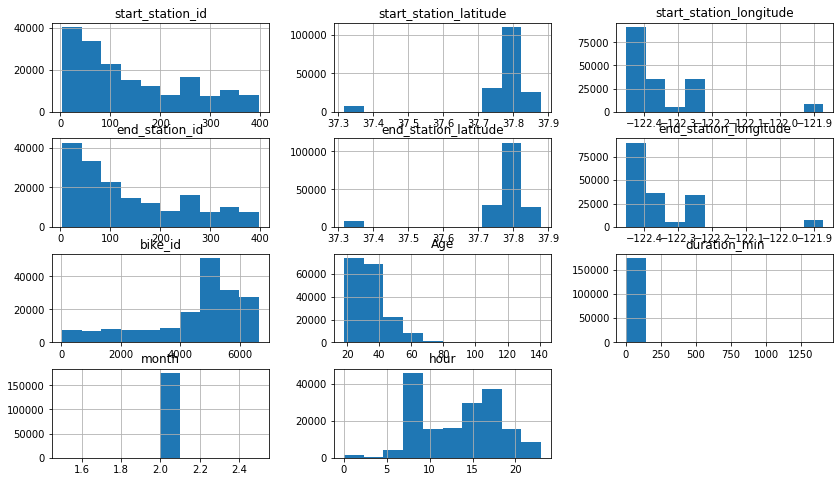

In [22]:
df.hist(figsize=(14,8));

In [23]:
color = sb.color_palette()[0]

### What is trip frequency per week day ?

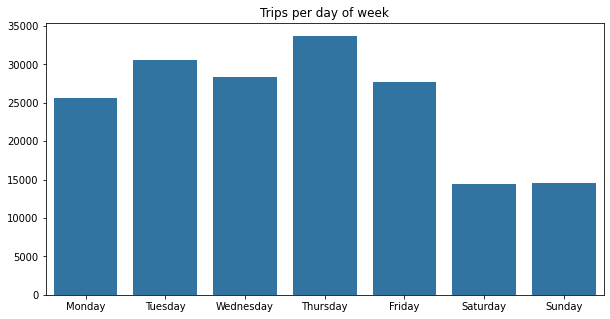

In [24]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data=df, x='day', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', "Saturday", "Sunday"],color=color)
plt.title('Trips per day of week')
plt.xlabel('')
plt.ylabel('');


>**Weekend days are the lowest in number of trips while on Thursday there is a huge demand on service**

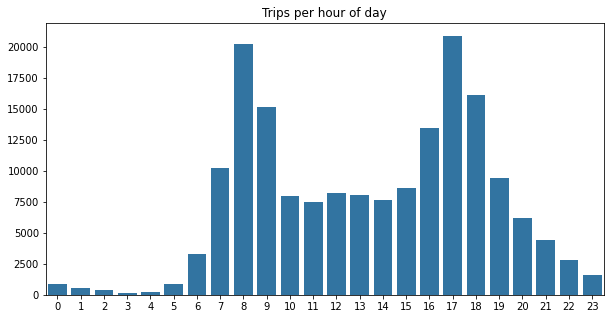

In [25]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data=df, x='hour', color= color)
plt.title('Trips per hour of day')
plt.xlabel('')
plt.ylabel('');


>**There are 2 waves of rush hours; firstly at the morning from 7 AM to 9 AM with a peak on 8 am, the second peak from 16 PM to 18 PM clock with a peak on 17 clock.**<br>

In [26]:
np.arange(0, (df['duration_min'].max())+1, .5)

array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.4090e+03, 1.4095e+03,
       1.4100e+03])

### Whats is the average trip duration?

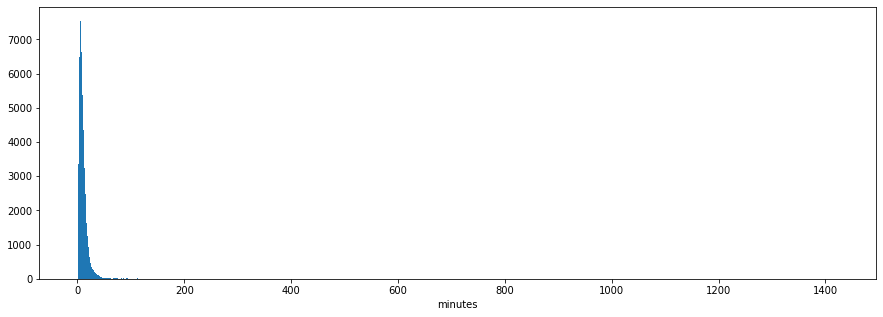

In [27]:
plt.figure(figsize = [15, 5]) 
bins =  np.arange(0, (data['duration_min'].max())+15, 0.5)
plt.hist(data=df, x='duration_min', bins = bins)
plt.xlabel('minutes');

Text(0.5, 1.0, 'Trip duration in log scale')

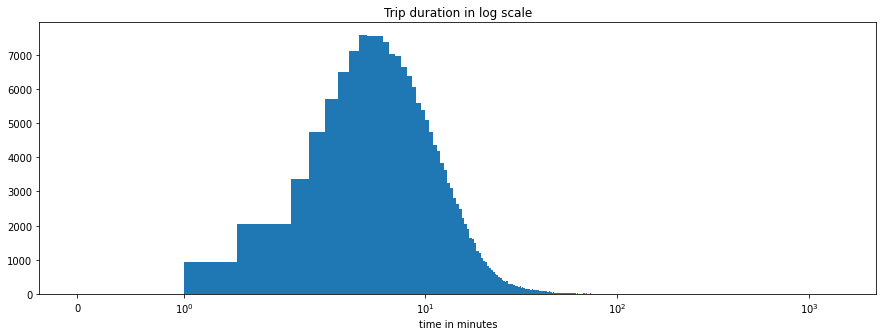

In [28]:
#try log scale 
plt.figure(figsize = [15, 5])
bins =  np.arange(0, (data['duration_min'].max())+5, 0.5)
plt.hist(data=df, x='duration_min', bins=bins);
plt.xscale('symlog')
plt.xlabel('time in minutes')
plt.title('Trip duration in log scale')

>**The data is right skewed, while it's beak below 10 mintues**

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

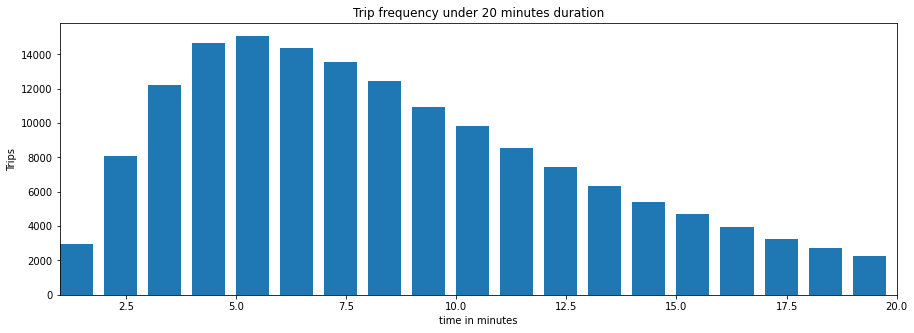

In [29]:
plt.figure(figsize = [15, 5]) 
bins =  np.arange(0, (data['duration_min'].max())+5,1)
plt.hist(data=df, x='duration_min', bins = bins,width = .75)
plt.xlabel('time in minutes')
plt.ylabel('Trips')
plt.title('Trip frequency under 20 minutes duration')
plt.xlim([1,20]);

>**Clients use the service for short trips that usually take from 3 to 7 minutes. There is inverse relationship between the trip duration and number of trips.** <br><br>
>**From the previous graphs it appears that clients use the service in rush hours where there is a traffic jam or may be they prefer to take a short ride instead of walking**

### What are the top 10 Start - End stations? 

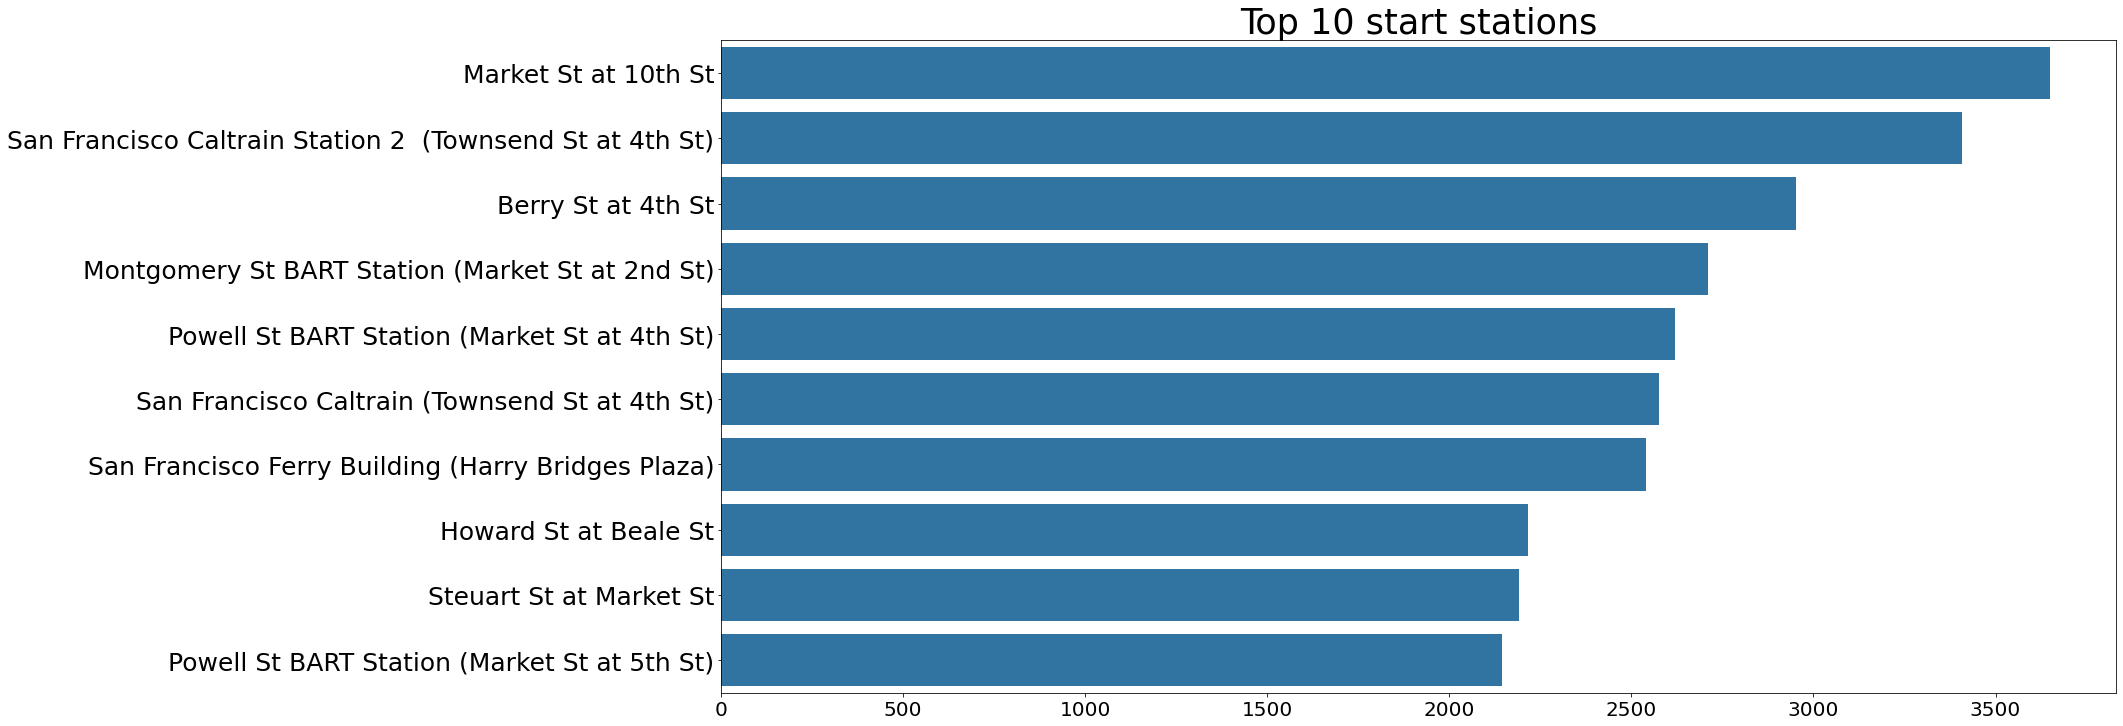

In [30]:
plt.figure(figsize = [25,12]) 
sb.countplot(data=data, y='start_station_name',order=df.start_station_name.value_counts().iloc[:10].index, color = color)
plt.title('Top 10 start stations',fontsize=35)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=25)
plt.xticks(fontsize=20);

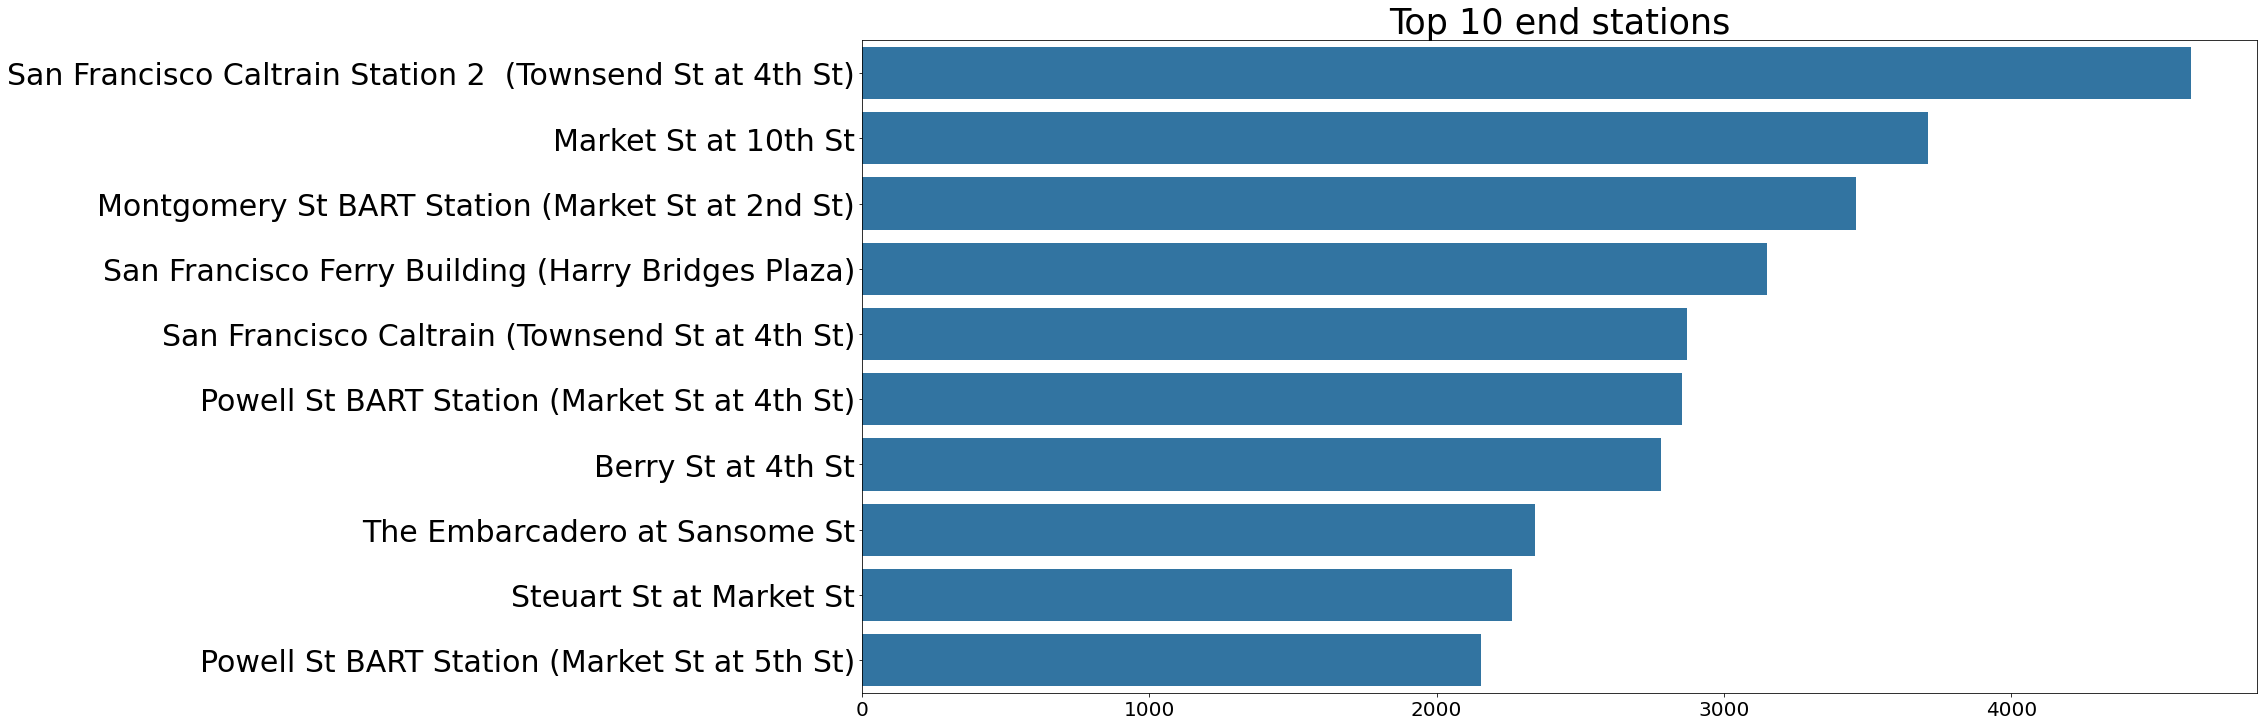

In [31]:
plt.figure(figsize = [25,12]) 
sb.countplot(data=data, y='end_station_name',order=df.end_station_name.value_counts().iloc[:10].index, color = color)
plt.title('Top 10 end stations',fontsize=35)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=30)
plt.xticks(fontsize=20);

>**Top 10 station as starting point are very similar to end point, which supooert the theory that clients use the service to avoid heavy traffice and to get into or out from these spots quickly**<br><br>
**For any future upgrades or expanding in stations Market St has a huge potiential**

### Whats is gender distribution ?

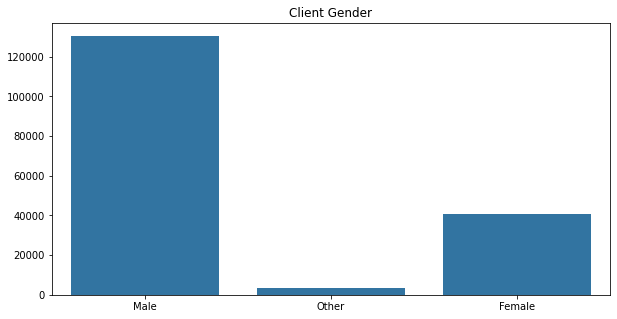

In [32]:
plt.figure(figsize = [10,5])
sb.countplot(data=data, x='member_gender',color=color)
plt.title('Client Gender')
plt.xlabel('')
plt.ylabel('');

>**Males are the most clients**

### Trips counts VS Age group

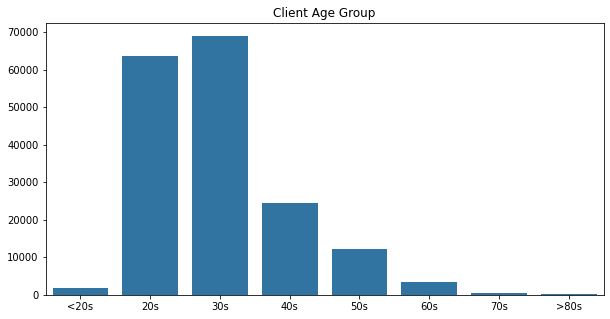

In [33]:
plt.figure(figsize = [10,5]) 
sb.countplot(data=data, x='age_group', color=color)
plt.title('Client Age Group')
plt.xlabel('')
plt.ylabel('');

> **People in twenties and thirties are more likely to use the service compared to other age groups, which is make because riding a bike require is considred an cardio exercises.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **I transformed the trip duration to be in minutes and then plot it in log scale due to the amount of data and it's distribution(right skewed), it turn out to be that the most trips took less than 10 minutes with outliers strarting from 100 minutes until 1400 minutes.**

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>1. **I converted birthyear to age then I grouped the age per decade.**
>1. **I extracted day of week and the hour of the start time to get the rush hours and find which day has most trips.**


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Explore who do the longer trips?

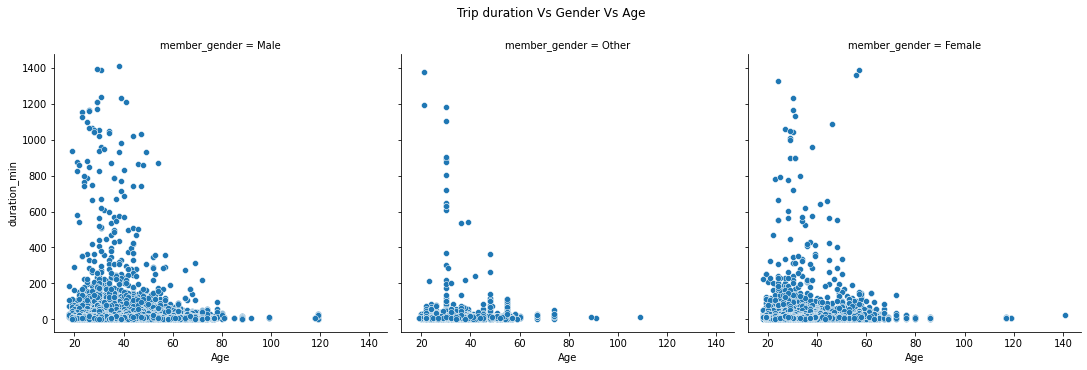

In [34]:
dur_gen_age = sb.relplot(x="Age", y="duration_min", col = 'member_gender' ,data=df)
dur_gen_age.fig.subplots_adjust(top=0.85)
dur_gen_age.fig.suptitle('Trip duration Vs Gender Vs Age');

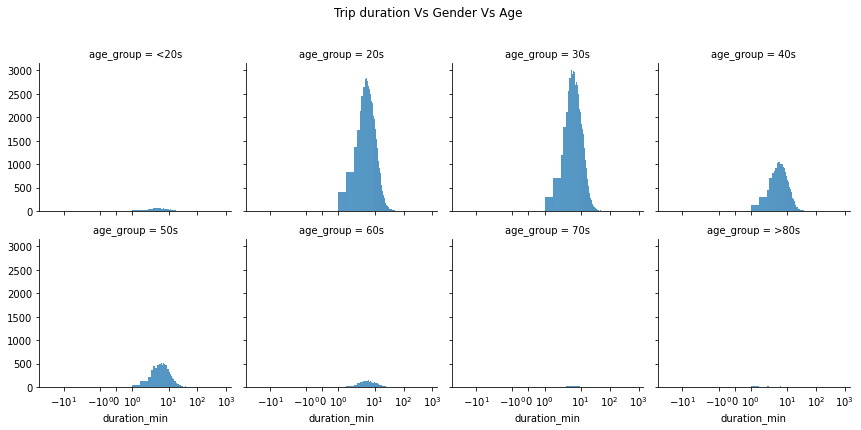

In [58]:
g = sb.FacetGrid(data = df, col = 'age_group', col_wrap = 4)
bins =  np.arange(0, (df['duration_min'].max())+5, 0.5)
g.map(sb.histplot,'duration_min', bins=bins)
g.fig.suptitle('Trip duration Vs Gender Vs Age')
plt.xscale('symlog')
g.fig.subplots_adjust(top=0.85);

>1. **People below 60 years are using bikes to go farther trips.**
>2. **There is a user who record his age is 140 years which may be mistyping error.**
>3. **Users with age more than 80 years old need more insvestigation to check if their birth year is right or it was just a mistyping error.**
>4. **Despite age group, the mean trip duration is nearly same which is less than 10 minutes.**

### Check if there is trips with same start station and end station, if exist are these trips were done by mistake by checking  trip duration

In [36]:
same_station = df.query("start_station_name == end_station_name")
same_station = same_station.copy()

In [37]:
trips_count = df.shape[0]
same_station_count = same_station.shape[0]
rest_trips_count = trips_count- same_station_count
same_station_percent = same_station.shape[0]/df.shape[0]*100

In [38]:
mistake_trips = same_station[same_station['duration_min']<2].shape[0]

In [39]:
mistake_trips_percent = mistake_trips/same_station_count*100

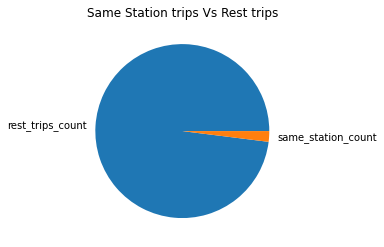

In [59]:
labels = ['rest_trips_count', 'same_station_count']
sizes = [rest_trips_count, same_station_count]
plt.pie(sizes,labels=labels)
plt.title('Same Station trips Vs Rest trips');

In [41]:
bins = [0, 1.9, 1233]
labels = ['<2 min','>2 min']
same_station['duration'] = pd.cut(same_station['duration_min'], bins, labels=labels)

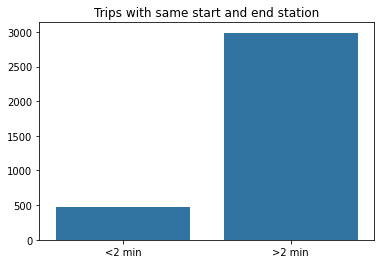

In [42]:
sb.countplot(data=same_station, x='duration', color = color)
plt.title('Trips with same start and end station')
plt.xlabel('')
plt.ylabel('');

> **Trips with duration less than 2 minutes tend to be done by mistake or there wasn't acutual trip, people really depend on the service for short trips or may be they can go and get something and return to thier place.**

### check the rush hours and the top stations.

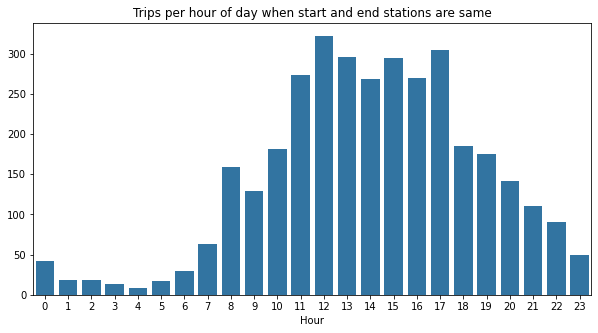

In [43]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data=same_station, x='hour', color= color)
plt.title('Trips per hour of day when start and end stations are same')
plt.xlabel('Hour')
plt.ylabel('');

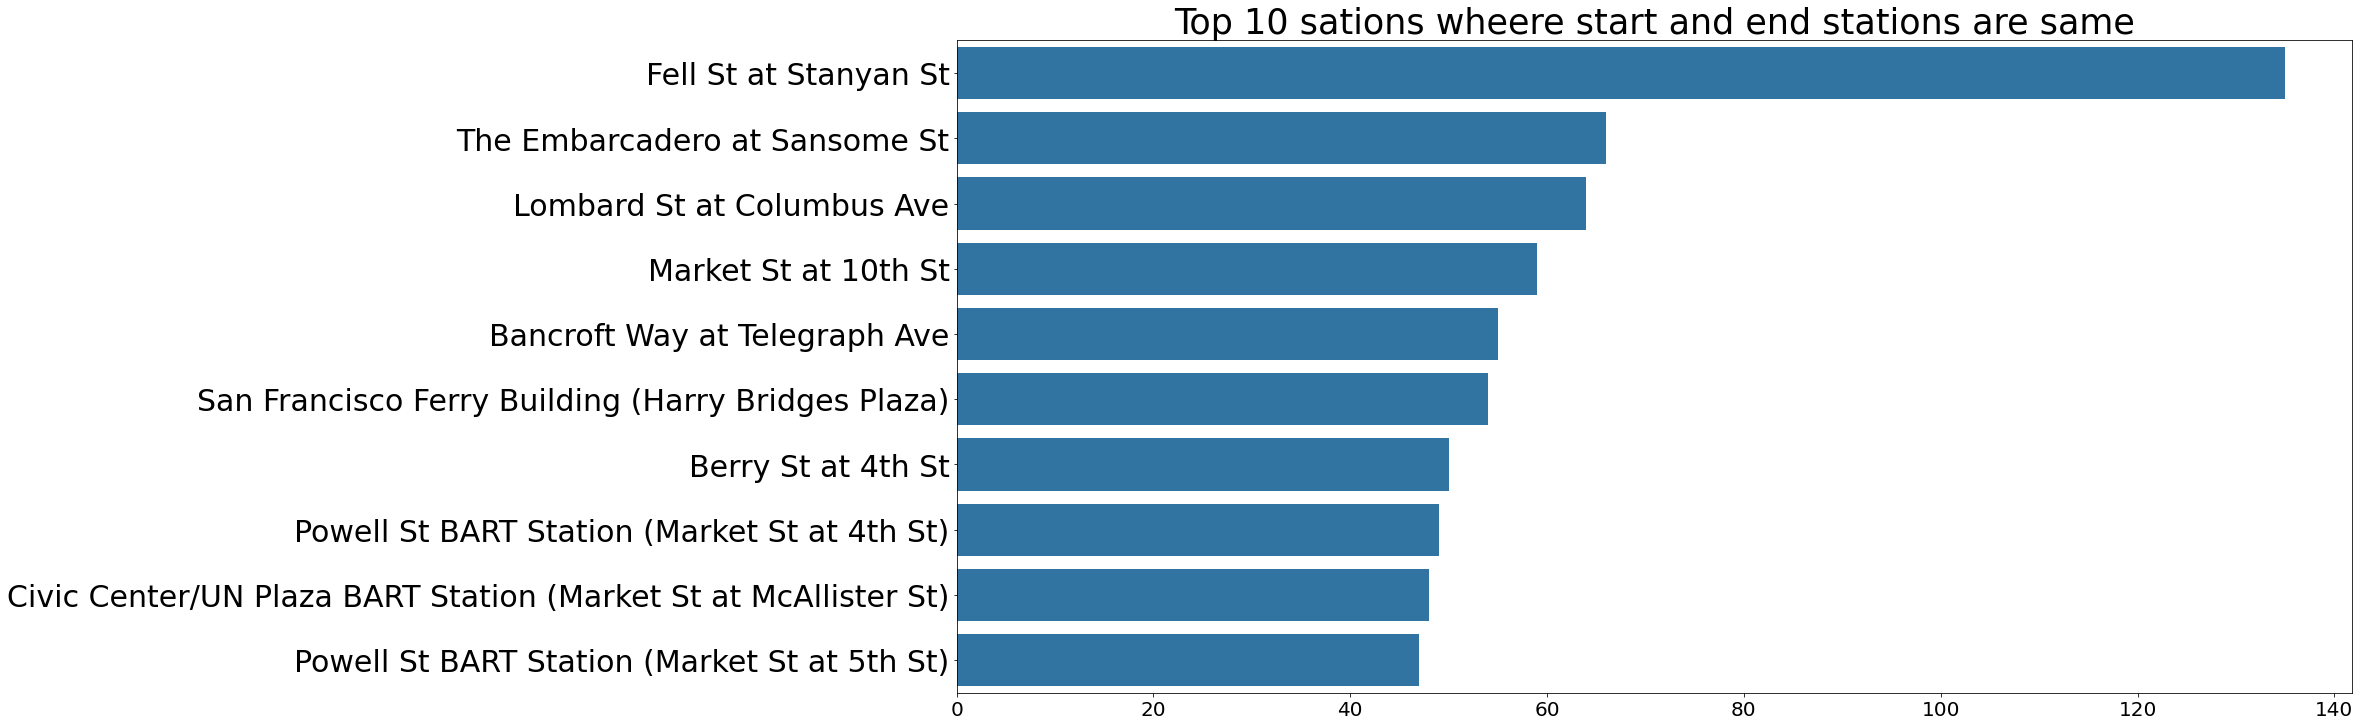

In [44]:
plt.figure(figsize = [25,12]) 
sb.countplot(data=same_station, y='end_station_name',order=same_station.end_station_name.value_counts().iloc[:10].index, color = color)
plt.title('Top 10 sations wheere start and end stations are same',fontsize=35)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=30)
plt.xticks(fontsize=20);

> **Interesting how the rush hours changed to be from 11 AM to 5 PM, also Fell St is the most start and end station.**

### Does Rush hour change by day ?

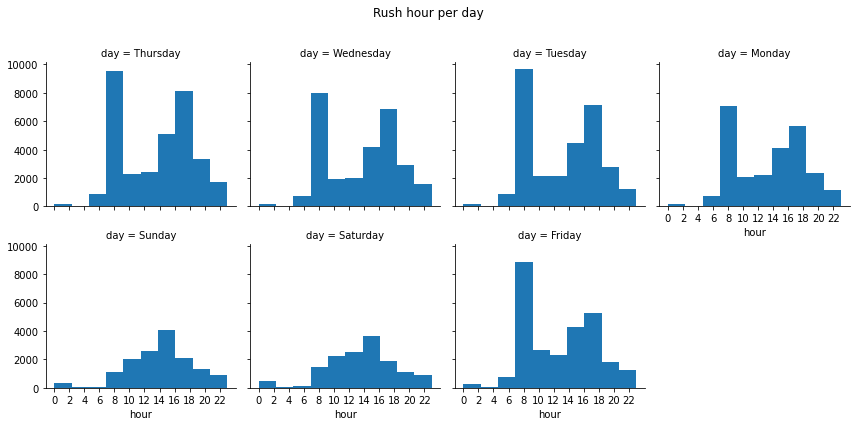

In [60]:
g = sb.FacetGrid(data = df, col = 'day',col_wrap=4)
g.map(plt.hist, "hour")
plt.xticks(np.arange(min(df.hour), max(df.hour)+1, 2))
g.fig.suptitle('Rush hour per day')
g.fig.subplots_adjust(top=0.85);

>1. **Rush hours in working days are nearly same with 2 peaks, while week end days has one peak in diffrent hour. Also there is noticable increase in usage on midnight of weekends.**<br>
>1. **Tuesday and Thursday are the most busiest days**

## Does Age group affected by hour?

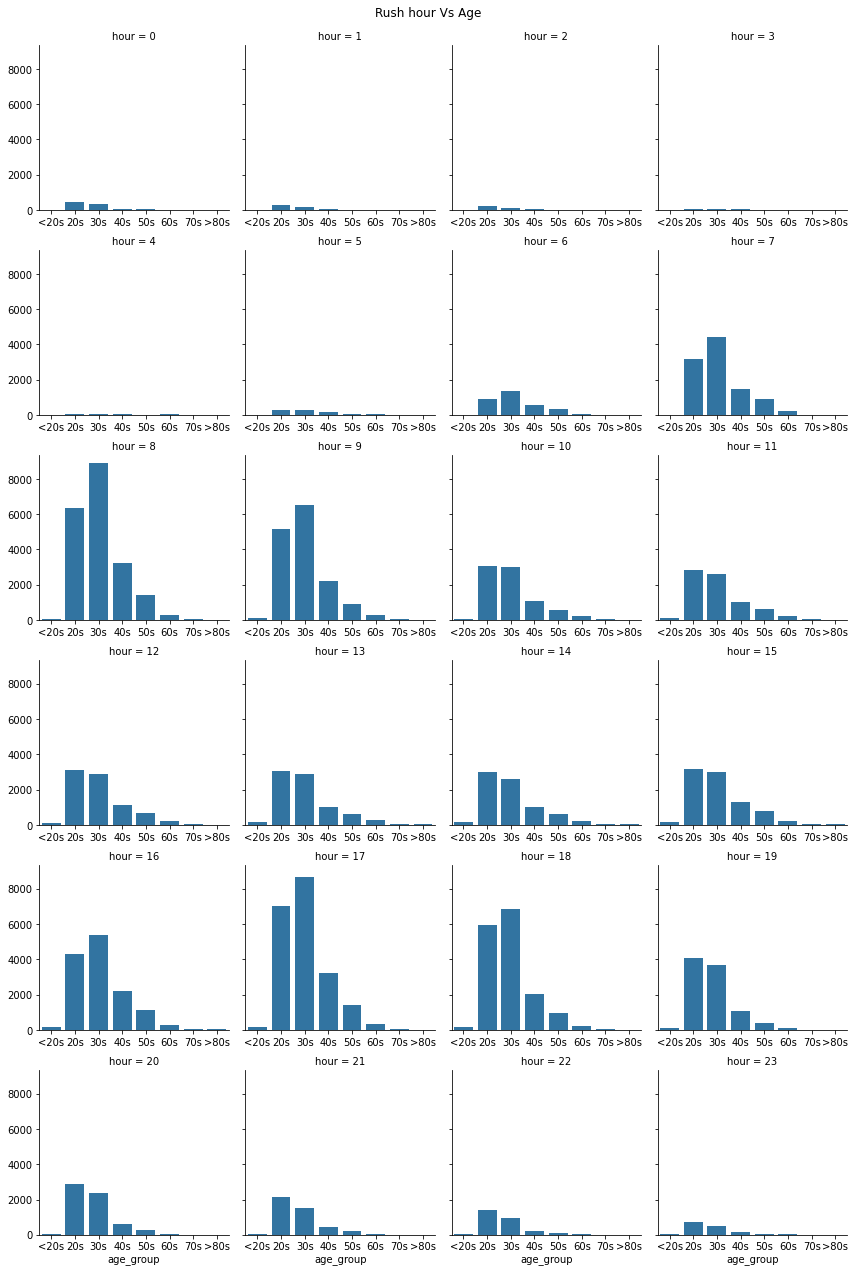

In [66]:
g = sb.FacetGrid(data = df, col = 'hour',col_wrap=4, sharex=False)
g.map(sb.countplot, "age_group", order =['<20s','20s','30s','40s','50s','60s','70s','>80s'] );
g.fig.suptitle('Rush hour Vs Age')
g.fig.subplots_adjust(top=.95);

>**After 6 PM till 5 AM people in twenties are the main users, while in rest of day people in thirties are the main users.**

### Is there any favourite bikes ?

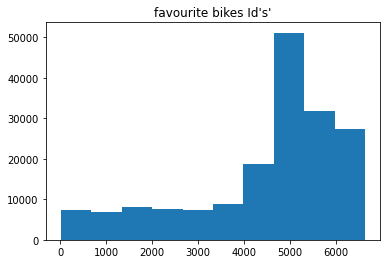

In [68]:
plt.hist(data=df, x='bike_id');
plt.title("favourite bikes Id's'");

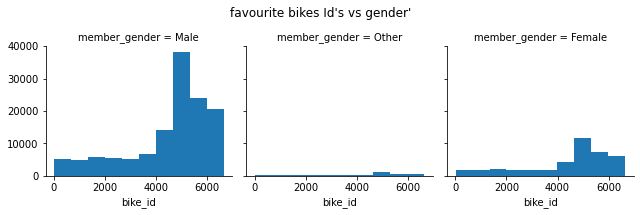

In [72]:
g = sb.FacetGrid(data = df, col = 'member_gender')
g.map(plt.hist, "bike_id")
plt.tight_layout()
g.fig.suptitle("favourite bikes Id's vs gender'")
g.fig.subplots_adjust(top=.8);

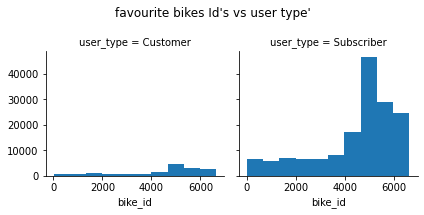

In [73]:
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, "bike_id")
g.fig.suptitle("favourite bikes Id's vs user type'")
g.fig.subplots_adjust(top=.8);
plt.tight_layout()

>**Bikes with Id range (4000 : 6000) are very popular across all users and genders.**

### Does top 10 start stations affect by day of week ?

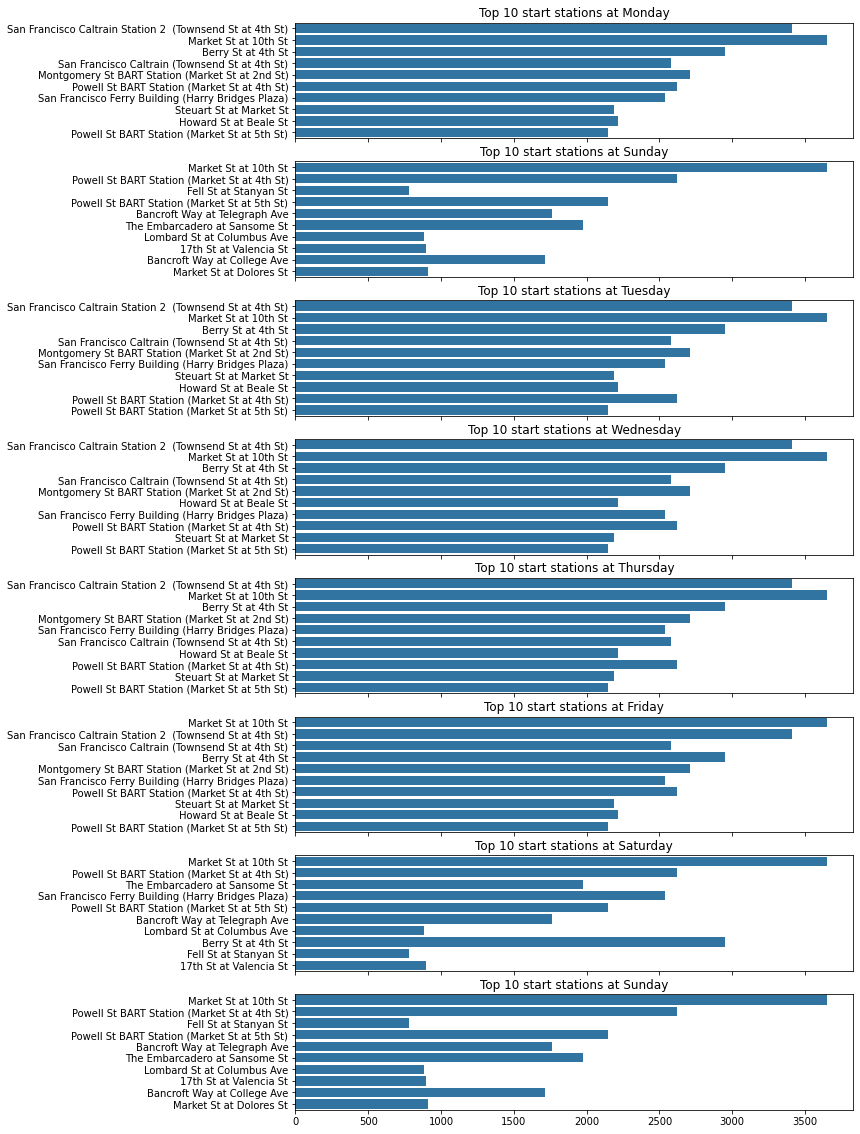

In [50]:
fig, axes = plt.subplots(8,1 , figsize=(10, 20) ,sharex=True)
sb.countplot(ax=axes[0], data=df, y='start_station_name',order=df.query('day == "Monday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[0].set(xlabel= '', ylabel='', title='Top 10 start stations at Monday')
sb.countplot(ax=axes[1], data=df, y='start_station_name',order=df.query('day == "Sunday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[1].set(xlabel= '', ylabel='', title='Top 10 start stations at Sunday')
sb.countplot(ax=axes[2], data=df, y='start_station_name',order=df.query('day == "Tuesday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[2].set(xlabel= '', ylabel='', title='Top 10 start stations at Tuesday')
sb.countplot(ax=axes[3], data=df, y='start_station_name',order=df.query('day == "Wednesday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[3].set(xlabel= '', ylabel='', title='Top 10 start stations at Wednesday')
sb.countplot(ax=axes[4], data=df, y='start_station_name',order=df.query('day == "Thursday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[4].set(xlabel= '', ylabel='', title='Top 10 start stations at Thursday')
sb.countplot(ax=axes[5], data=df, y='start_station_name',order=df.query('day == "Friday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[5].set(xlabel= '', ylabel='', title='Top 10 start stations at Friday')
sb.countplot(ax=axes[6], data=df, y='start_station_name',order=df.query('day == "Saturday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[6].set(xlabel= '', ylabel='', title='Top 10 start stations at Saturday')
sb.countplot(ax=axes[7], data=df, y='start_station_name',order=df.query('day == "Sunday"').start_station_name.value_counts().iloc[:10].index, color = color)
axes[7].set(xlabel= '', ylabel='', title='Top 10 start stations at Sunday');

>**Even in weekend days the top 10 start stations are same**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>1. **Trip duration mean is not afected by age group, even for younger age group they tend to do more trips, and the duration is more right skewed.**
>1. **trips with same same start and end station are about 2% of all trips, with 14 percent could be done by mistake trips as it's duration were less than 2 minutes.**
>1. **Same start and end stations trips have diffrent rush hours from 11 AM to 5 PM.**
>1. **Rush hours per week days are same with 2 peaks, while on weekends there only 1 rush hour around 2 PM.**
>1. **In weekends there noticable activity in late hours.**
>1. **After 6 PM till 5 AM people in twenties are the main users, while in rest of day people in thirties are the main users.**
>1. **The majority of users are subscriber.**
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> **Bikes with Id range (4000 : 6000) are very popular across all users and genders.**



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### User type per gender and age group

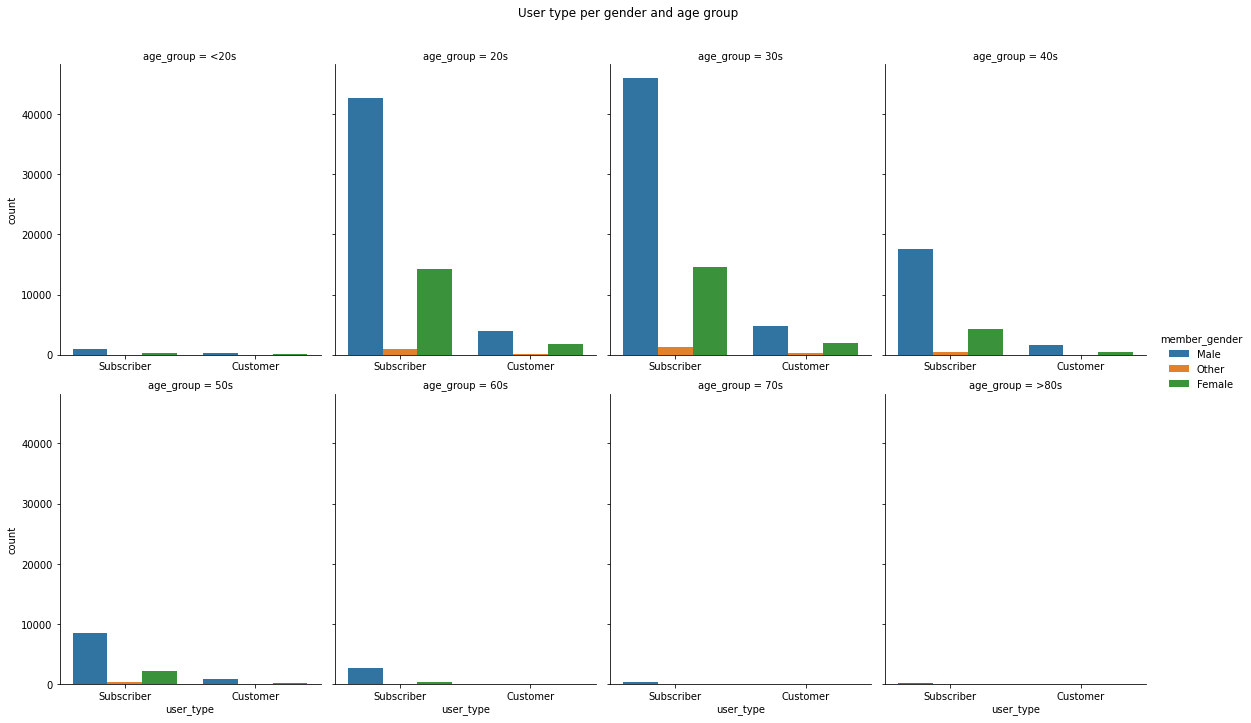

In [80]:
g = sb.catplot(x="user_type", col="age_group", col_wrap=4,hue = "member_gender",sharex= False,order = ['Subscriber', 'Customer'],
                data=df, kind="count", aspect=.8)
g.fig.suptitle("User type per gender and age group")
g.fig.subplots_adjust(top=.90);

>**The majority of users are subscriber, does it mean a high converstion rate?**

### How bike share for all trip bieng affected ?

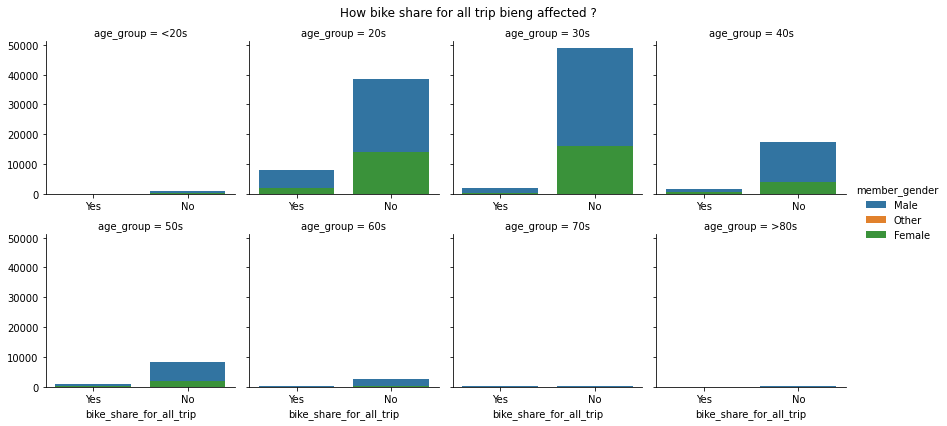

In [82]:
g = sb.FacetGrid(data = df, col = 'age_group', col_wrap = 4, hue= "member_gender", sharex=False)
g.map(sb.countplot, "bike_share_for_all_trip", order=['Yes','No'])
g.fig.suptitle("How bike share for all trip bieng affected ?")
g.fig.subplots_adjust(top=.90);
g.add_legend();

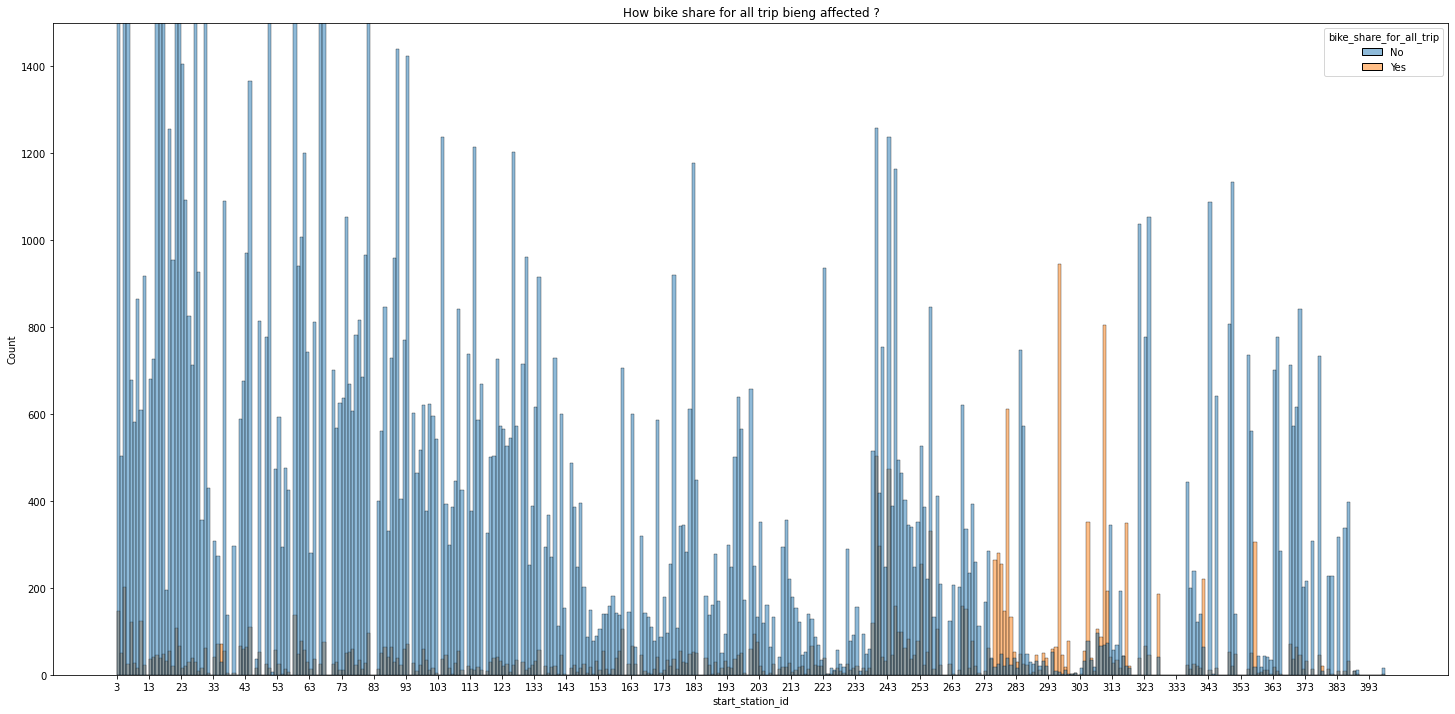

In [83]:
plt.figure(figsize = [25,12]) 
sb.histplot(data = df, x='start_station_id',binwidth=1, hue = 'bike_share_for_all_trip')
plt.xticks(np.arange(min(df.start_station_id), max(df.start_station_id)+1, 10))
plt.ylim(0,1500)
plt.title("How bike share for all trip bieng affect start station ?");

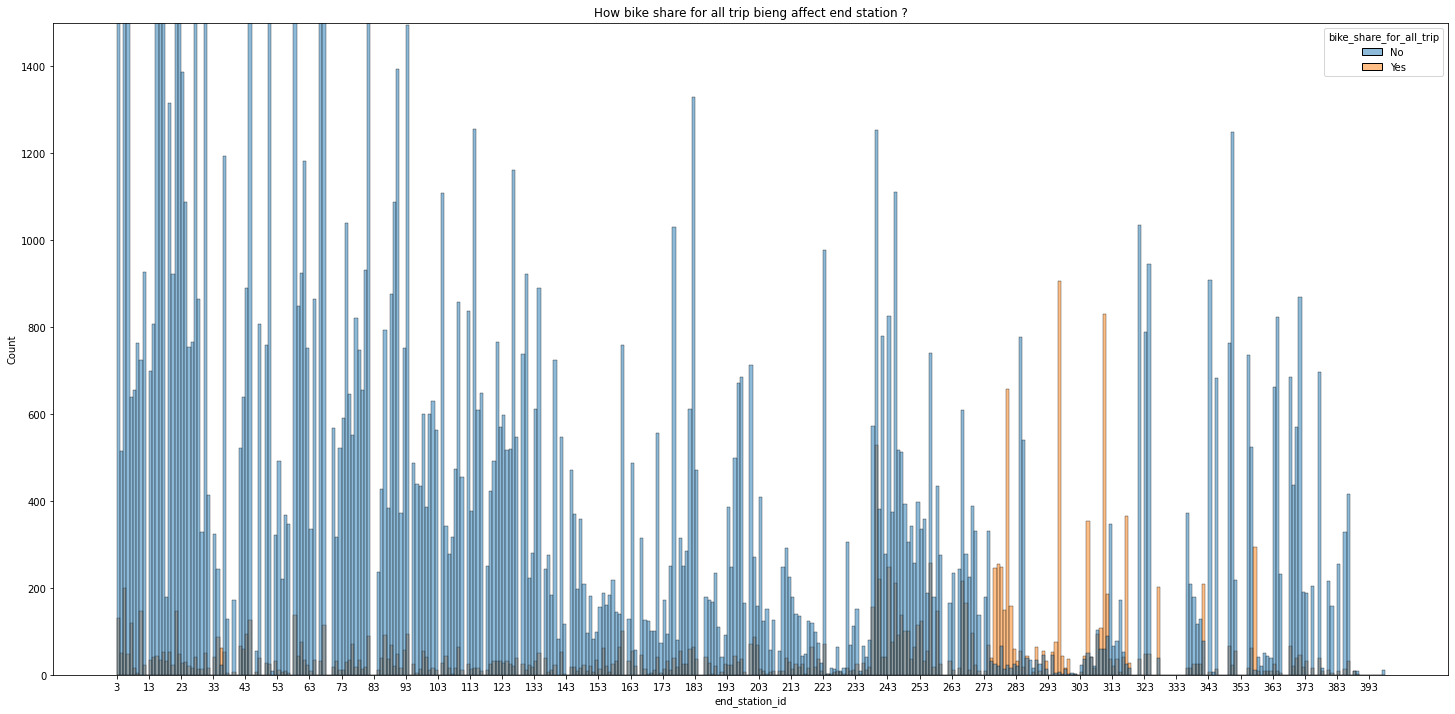

In [84]:
plt.figure(figsize = [25,12]) 
sb.histplot(data = df, x='end_station_id',binwidth=1, hue = 'bike_share_for_all_trip')
plt.xticks(np.arange(min(df.start_station_id), max(df.start_station_id)+1, 10))
plt.title("How bike share for all trip bieng affect end station ?");
plt.ylim(0,1500);

>**Certation Station usually are reported 'Yes' for bike share for all trip, I blieve that these stations location are very stratigic.**

In [55]:
df.query('bike_share_for_all_trip== "Yes"').end_station_name.value_counts()[:10]

5th St at Virginia St            905
San Fernando St at 4th St        831
San Fernando St at 7th St        657
Bancroft Way at Telegraph Ave    528
San Salvador St at 9th St        366
Ryland Park                      355
2nd St at Julian St              293
Hearst Ave at Euclid Ave         258
Morrison Ave at Julian St        255
Bancroft Way at College Ave      248
Name: end_station_name, dtype: int64

In [56]:
df.query('bike_share_for_all_trip== "Yes"').start_station_name.value_counts()[:10]

5th St at Virginia St            944
San Fernando St at 4th St        804
San Fernando St at 7th St        611
Bancroft Way at Telegraph Ave    503
Bancroft Way at College Ave      474
Ryland Park                      352
San Salvador St at 9th St        350
Hearst Ave at Euclid Ave         330
2nd St at Julian St              306
Haste St at Telegraph Ave        296
Name: start_station_name, dtype: int64

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **The majority of users are subscriber, does it mean a high converstion rate?**

### Were there any interesting or surprising interactions between features?

> **All trips from and to this station are reported with 'Yes' in bike share for all trip column *5th St at Virginia St*.**